<a href="https://colab.research.google.com/github/NicolaeAlin25/GDA2021/blob/main/Alin_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")

# Drop the rows with missing values
# Drop the "name" column
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2

# INSERT CODE HERE

In [ ]:
data.shape

(398, 9)

In [ ]:
data.head()
#data.isnull().sum()
#data.isna().sum()
# drop rows with missing values
data2 = data.drop(['name'], axis= 1)
df = data2.dropna()
df['origin'] = df['origin'].factorize()[0]
#df['origin'] = df['origin'].replace({'usa': 0, 'japan': 1, 'europe': 2})

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


In [ ]:
df['origin'].value_counts()

0    245
1     79
2     68
Name: origin, dtype: int64

In [ ]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%
# INSERT CODE HERE

# calculate mean of column "mpg"
#mean_mpg = df['mpg'].mean()
#print(mean_mpg)

#median_mpg = df['mpg'].median()
#print(median_mpg)

23.44591836734694
22.75


In [ ]:
# calculate X & Y
X = df.drop(['mpg'], axis =1)

# convert y as values 0 or 1
#y= df['mpg'].apply(lambda x: 0 if x <= 23 else 1)
#y.value_counts()

# i could say i have a balanced data

In [ ]:
y = df['mpg']

In [ ]:
# Split data rand 42, test size 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit a decision tree
# INSERT CODE HERE
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Predict on the xtest set
# INSERT CODE HERE
y_predict = modelDTR.predict(X_test)
y_predict

array([23. , 19. , 37.2, 33. , 27. , 29. , 12. , 31.5, 18. , 31. , 15. ,
       20.3, 16. , 29. , 17. , 27. , 18. , 32.4, 36.4, 37. , 23. , 34. ,
       35.1, 18. , 31. , 28. , 19. , 18. , 27. , 25. , 16. , 20.2, 23.9,
       28. , 14. , 31. ,  9. , 23. , 14. , 12. , 14. , 28. , 34. , 26. ,
       16. , 11. , 19. , 44.3, 25. , 33. , 14. , 21. , 21. , 37. , 38. ,
       16. , 19. , 19. , 24. , 23. , 11. , 22. , 28.8, 23.8, 23.9, 26. ,
       24.5, 33. , 23.9, 14. , 25. , 13. , 22. , 19. , 20.8, 24. , 13. ,
       18. , 24. ])

In [ ]:
# Print out the R2 score.
# INSERT CODE HERE
# print accuracy score
print("accuracy score on train set:",modelDTR.score(X_train, y_train))
print("accuracy score on test set:",modelDTR.score(X_test, y_test))

accuracy score on train set: 1.0
accuracy score on test set: 0.7521505644364419


In [ ]:
# Print out the R2 score
r2_score(y_test, y_predict)

0.7521505644364419

**OVERFITTING !!**  to avoid it, maybe i should change the max_depth inside the model and try to see which is the best solution

In [ ]:
# Print each feature with importance %
# INSERT CODE HERE
modelDTR.feature_importances_

array([0.00224265, 0.63256892, 0.17399683, 0.06279526, 0.02062544,
       0.10502161, 0.00274929])

In [ ]:
X.columns
# found that displacement & horsepower are the 2 most important features

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [ ]:
features = zip(X.columns,modelDTR.feature_importances_)
df_features = pd.DataFrame(list(features))
df_features.columns = ['Feature', 'Importance']
df_features

,Feature,Importance
0,cylinders,0.000632
1,displacement,0.633915
2,horsepower,0.174698
3,weight,0.061703
4,acceleration,0.020998
5,model_year,0.103779
6,origin,0.004275


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


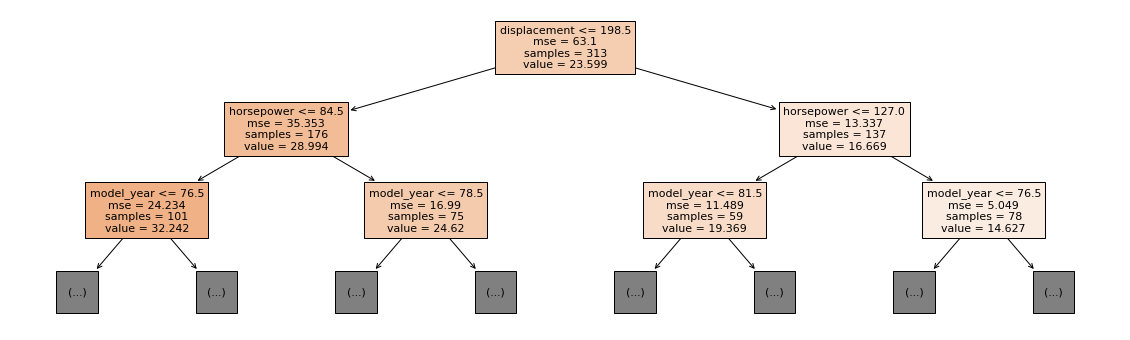

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,6))
plot_tree(modelDTR, filled = True,
          max_depth = 2,  
          class_names = modelDTR.classes_, 
          feature_names=X_train.columns )
plt.show()

## Classification Trees

In [ ]:
# Load in the Penguins dataset
data2 = sns.load_dataset('penguins')

# Drop rows with missing values
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2

# Turn the island column into numeric
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# INSERT CODE HERE
#data2.isnull().sum()
data.isna().sum()
# drop rows with missing values
df2 = data2.dropna()

#df2['species'] = df2['species'].factorize()[0]
df2['species'] = df2['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
#df2['island'] = df2['island'].factorize()[0]
df2['island'] = df2['island'].replace({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2})

In [ ]:
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,Female
340,2,1,46.8,14.3,215.0,4850.0,Female
341,2,1,50.4,15.7,222.0,5750.0,Male
342,2,1,45.2,14.8,212.0,5200.0,Female


In [ ]:
data2.shape
df2['island'].value_counts()
#data2['island'].value_counts()

1    163
2    123
0     47
Name: island, dtype: int64

In [ ]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets
# INSERT CODE HERE
# calculate X & Y
X2 = df2.drop(['sex'], axis =1)
y2 = df2['sex']
# convert y as values 0 or 1
y2 = df2['sex'].apply(lambda x: 0 if x == 'Female' else 1)
y2.value_counts()


1    168
0    165
Name: sex, dtype: int64

In [ ]:
# Split data rand 42, test size 20%

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
# Using a random state of 42, fit the classification tree.
# INSERT CODE HERE
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Print the predictions on the test set
# INSERT CODE HERE
y_predict2 = modelDTC.predict(X_test2)
y_predict2

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0])

In [ ]:
# Print the accuracy score for the predictions
# INSERT CODE HERE
# print accuracy score
print("accuracy score on train set:",modelDTC.score(X_train2, y_train2))
print("accuracy score on test set:",modelDTC.score(X_test2, y_test2))
print("R2 score on test set :", r2_score(y_test2, y_predict2))

accuracy score on train set: 1.0
accuracy score on test set: 0.8507462686567164
R2 score on test set : 0.39639639639639646


In [ ]:
# Print each feature with importance %
# INSERT CODE HERE
modelDTC.feature_importances_
# best feature is "bill_depth_mm"

array([0.        , 0.        , 0.0868705 , 0.48912683, 0.02603034,
       0.39797233])

In [ ]:
X_train2.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g'],
      dtype='object')

In [ ]:
features2 = zip(X2.columns,modelDTC.feature_importances_)
df_features2 = pd.DataFrame(list(features2))
df_features2.columns = ['Feature', 'Importance']
df_features2

,Feature,Importance
0,species,0.000000
1,island,0.000000
2,bill_length_mm,0.086870
3,bill_depth_mm,0.489127
4,flipper_length_mm,0.026030
5,body_mass_g,0.397972


In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plot_tree(modelDTC, filled = True,
          max_depth = 2,  
          class_names = modelDTC.classes_, 
          feature_names=X_train2.columns )
plt.show()

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies = []
max_depth = []
for i in range(1, 11):
  # INSERT CODE HERE
  modelDTC2 = DecisionTreeClassifier(max_depth = i)
  modelDTC2.fit(X_train2, y_train2)
  accuracy = modelDTC2.score(X_test2, y_test2)
  list_of_accuracies.append(accuracy)
  max_depth.append(i)

list_of_accuracies

[0.7014925373134329,
 0.8208955223880597,
 0.835820895522388,
 0.8507462686567164,
 0.8507462686567164,
 0.8507462686567164,
 0.835820895522388,
 0.8805970149253731,
 0.8656716417910447,
 0.8507462686567164]

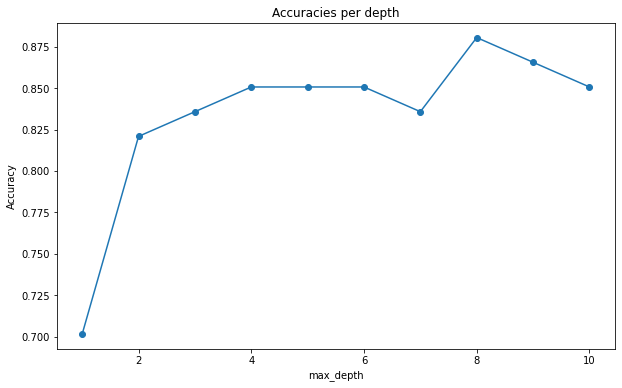

In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(max_depth, 
        list_of_accuracies,
        marker = 'o')

ax.set(title = "Accuracies per depth",
       xlabel = "max_depth",
       ylabel = "Accuracy")

plt.show()